# Social network analysis

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Read graph from saved file.

In [2]:
graph = nx.read_gpickle('graphs/valerois.gpickle')

**1) Report number of nodes and edges**

In [3]:
print('Number of nodes: {}'.format(graph.number_of_nodes()))
print('Number of edges: {}'.format(graph.number_of_edges()))

Number of nodes: 74990
Number of edges: 150563


**2) Degree centrality**

In [4]:
degree_centrality = nx.degree_centrality(graph)
degree_centrality_df = pd.DataFrame.from_dict(degree_centrality, orient='index', columns=['Degree_centrality'])

In [5]:
n = 10
print('{} users with highest degree centrality:'.format(n))
deg_cen_df = degree_centrality_df.sort_values('Degree_centrality', ascending=False).reset_index()
deg_cen_df.columns = ['Person', 'Degree_centrality']
deg_cen_df.head(n)

10 users with highest degree centrality:


Person  Degree_centrality
0    alexpashkov           0.033152
1      morseanen           0.032805
2  milaanufrieva           0.032791
3     magesqueen           0.032725
4         karial           0.032565
5    grazdano4ka           0.032551
6         trirub           0.032298
7        vorodis           0.032258
8             f3           0.032191
9   no_globalism           0.032138

**3) Degree distribution in log-log scale**

In [6]:
degrees = [deg for key, deg in graph.degree]

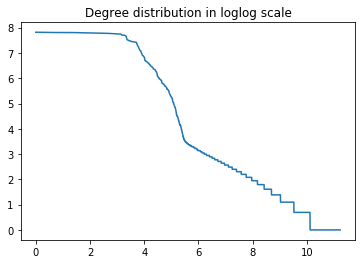

In [7]:
plt.plot(np.log(np.arange(1, len(degrees)+1)), np.log(sorted(degrees, reverse=True)))
plt.title('Degree distribution in loglog scale')
plt.show()

**4) Betweenness centrality**

In [8]:
nodes = [node for node in graph.nodes()]

In [9]:
graph_for_betweenness_centrality = graph.subgraph(nodes[0:5500])

In [10]:
graph_for_betweenness_centrality.number_of_edges()

20217

In [11]:
betweenness_centrality = nx.betweenness_centrality(graph_for_betweenness_centrality)

In [13]:
betweenness_centrality_df = pd.DataFrame.from_dict(betweenness_centrality, orient='index', columns=['betweenness_centrality'])

In [15]:
n = 10
print('{} users with highest betweenness centrality:'.format(n))
bet_cen_df = betweenness_centrality_df.sort_values('betweenness_centrality', ascending=False).reset_index()
bet_cen_df.columns = ['Person', 'Betweenness_centrality']
bet_cen_df.head(n)

10 users with highest betweenness centrality:


Person  Betweenness_centrality
0      bagira                0.363900
1    angerona                0.204502
2      yankel                0.186342
3     recoder                0.167666
4       yelya                0.093837
5       ponka                0.065209
6       saper                0.059785
7    valerois                0.056214
8  azbukivedi                0.049433
9     monella                0.049227

**5) Save results to csv.**

In [18]:
with open('results/nodes_edges.csv', 'w') as file:
    file.write('nodes,' + str(graph.number_of_nodes()) + '\n')
    file.write('edges,' + str(graph.number_of_edges()) + '\n')
with open('results/degree_centrality.csv', 'w') as file:
    for i in range(10):
        file.write(str(deg_cen_df.Person[i]) + ',' + str(deg_cen_df.Degree_centrality[i]) + '\n')
with open('results/betweenness_centrality.csv', 'w') as file:
    for i in range(10):
        file.write(str(bet_cen_df.Person[i]) + ',' + str(bet_cen_df.Betweenness_centrality[i]) + '\n')